In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from datetime import datetime
import json
from wordcloud import WordCloud

%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

import warnings
warnings.filterwarnings(action="ignore")

In [11]:
df = pd.read_csv('after_merge.csv')
df = df.iloc[:,1:]
df

,State Abbreviation,Accident Severity in State,Number of Accidents in State,State,Customer,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,WA,2.31,32554,Washington,BU79786,2763.52,No,Basic,Bachelor,2/24/11,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.81,Two-Door Car,Medsize
1,AZ,2.07,56504,Arizona,QZ44356,6979.54,No,Extended,Bachelor,1/31/11,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.46,Four-Door Car,Medsize
2,NV,2.23,6197,Nevada,AI49188,12887.43,No,Premium,Bachelor,2/19/11,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.47,Two-Door Car,Medsize
3,CA,2.04,795868,California,WW63253,7645.86,No,Basic,Bachelor,1/20/11,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.88,SUV,Medsize
4,WA,2.31,32554,Washington,HB64268,2813.69,No,Basic,Bachelor,3/2/2011,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.13,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,CA,2.04,795868,California,LA72316,23405.99,No,Basic,Bachelor,10/2/2011,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.23,Four-Door Car,Medsize
9130,CA,2.04,795868,California,PK87824,3096.51,Yes,Extended,College,12/2/2011,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.20,Four-Door Car,Medsize
9131,CA,2.04,795868,California,TD14365,8163.89,No,Extended,Bachelor,6/2/2011,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.78,Four-Door Car,Medsize
9132,CA,2.04,795868,California,UP19263,7524.44,No,Extended,College,3/2/2011,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.20,Four-Door Car,Large


In [12]:
df['Effective To Date']= df['Effective To Date'].astype('datetime64[ns]')

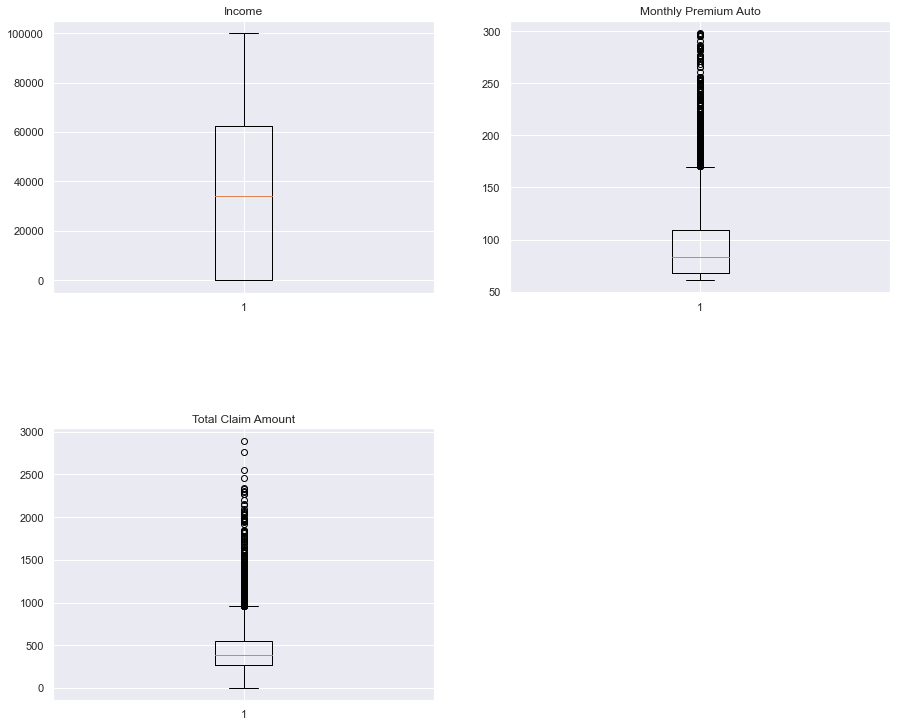

In [15]:
significant_cont = ['Income','Monthly Premium Auto','Total Claim Amount']

sns.set(color_codes=True)
plt.figure(figsize=(15,20))
plt.subplots_adjust(hspace=0.5)

for i in range(len(significant_cont)):
    plt.subplot(3,2,i+1)
    plt.boxplot(df[significant_cont[i]])
    plt.title(significant_cont[i])
    
plt.show()

In [16]:
cat_df = df.select_dtypes(include='object')
cat_df = cat_df.drop(['Customer'], axis = 1)
cols = cat_df.columns
cols

Index(['State Abbreviation', 'State', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status',
       'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

<Figure size 432x288 with 0 Axes>

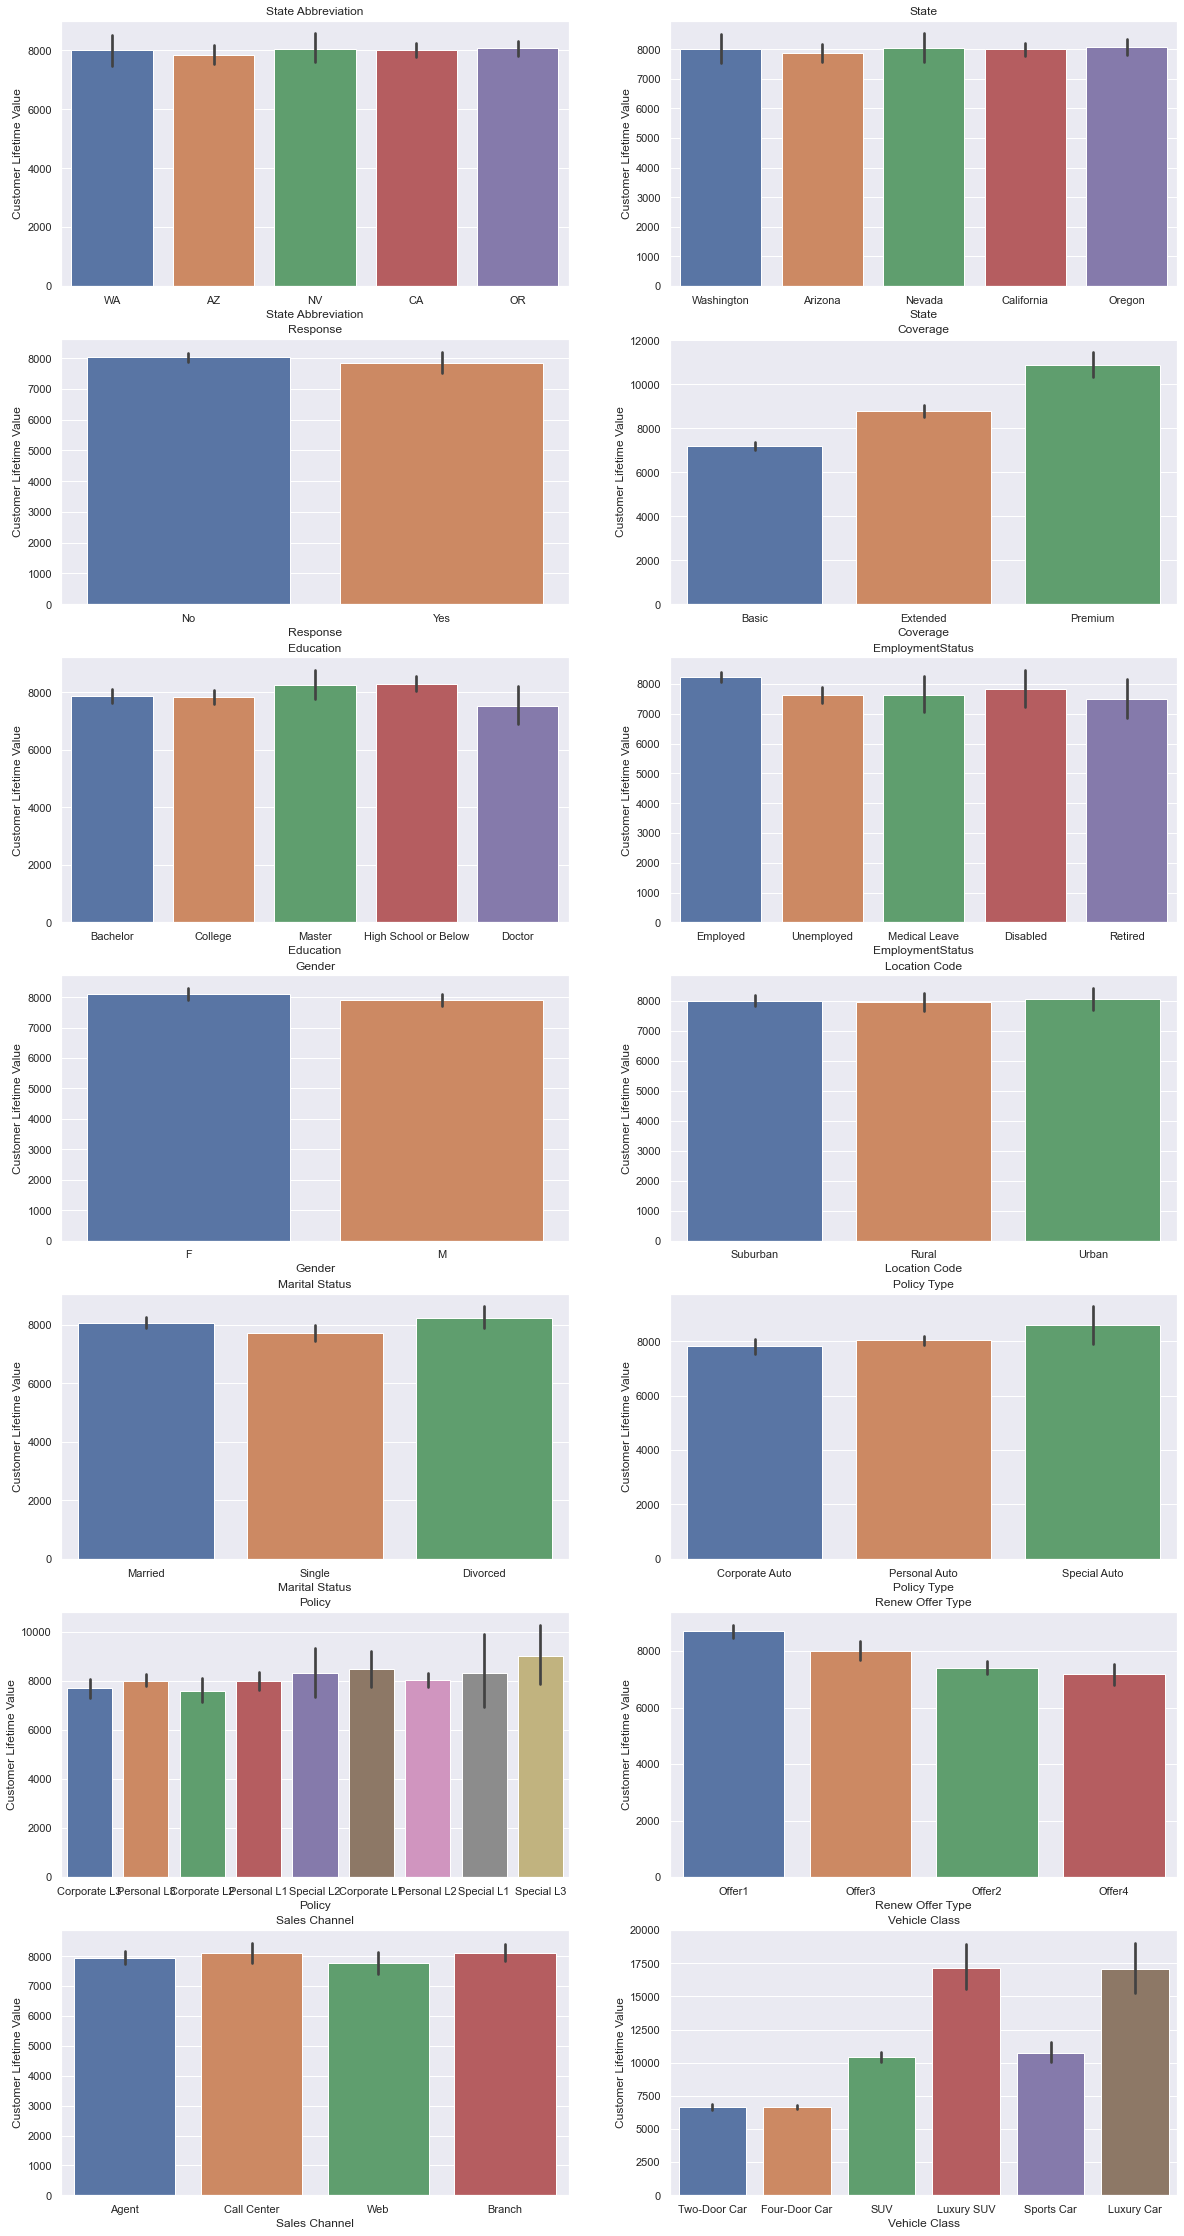

In [18]:
sns.set(color_codes=True)
plt.subplots_adjust(hspace=0.5)
plt.figure(figsize=(20,40))

for i in range(len(cols)-1):
    plt.subplot(7,2,i+1)
    sns.barplot(x = cols[i],y='Customer Lifetime Value',data = df)
    plt.title(cols[i])
    
plt.show()

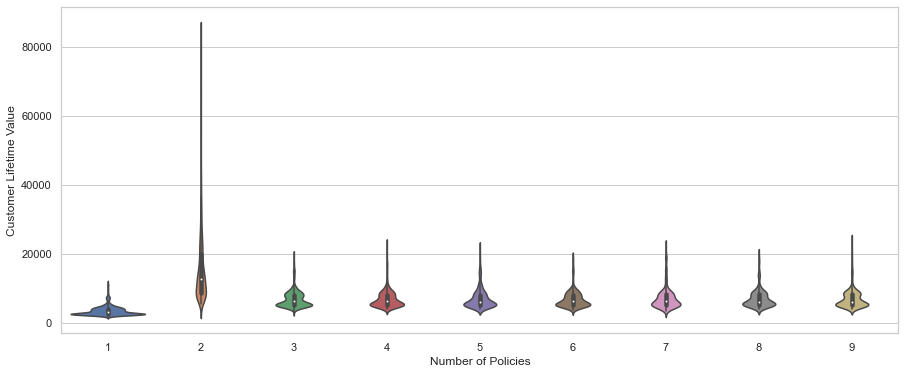

In [19]:
sns.set(style="whitegrid")
plt.figure(figsize=(15,6))
ax = sns.violinplot(x="Number of Policies", y="Customer Lifetime Value", data=df)

In [30]:
df2 =df.copy()

In [31]:
df2.drop(['State','Coverage','Renew Offer Type','Vehicle Class','Customer','Response','Gender','Location Code','Vehicle Size','Policy','Policy Type','Sales Channel','Effective To Date'],axis=1,inplace = True)

In [32]:
df2['Number of Policies'] = np.where(df2['Number of Policies']>2,3,df2['Number of Policies'])

In [45]:
new = pd.get_dummies(df2,columns=['State Abbreviation','Marital Status','Number of Policies','Education','EmploymentStatus'],drop_first=True)

In [46]:
new

,Accident Severity in State,Number of Accidents in State,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Total Claim Amount,State Abbreviation_CA,...,Number of Policies_2,Number of Policies_3,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed
0,2.31,32554,2763.52,56274,69,32,5,0,384.81,0,...,0,0,0,0,0,0,1,0,0,0
1,2.07,56504,6979.54,0,94,13,42,0,1131.46,0,...,0,1,0,0,0,0,0,0,0,1
2,2.23,6197,12887.43,48767,108,18,38,0,566.47,0,...,1,0,0,0,0,0,1,0,0,0
3,2.04,795868,7645.86,0,106,18,65,0,529.88,1,...,0,1,0,0,0,0,0,0,0,1
4,2.31,32554,2813.69,43836,73,12,44,0,138.13,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,2.04,795868,23405.99,71941,73,18,89,0,198.23,1,...,1,0,0,0,0,0,1,0,0,0
9130,2.04,795868,3096.51,21604,79,14,28,0,379.20,1,...,0,0,1,0,0,0,1,0,0,0
9131,2.04,795868,8163.89,0,85,9,37,3,790.78,1,...,1,0,0,0,0,0,0,0,0,1
9132,2.04,795868,7524.44,21941,96,34,3,0,691.20,1,...,0,1,1,0,0,0,1,0,0,0


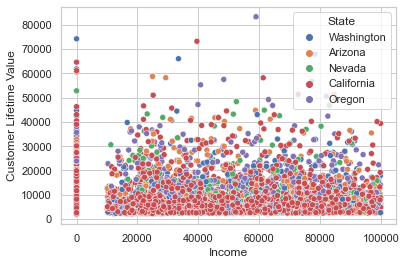

In [47]:
ax = sns.scatterplot(x="Income", y="Customer Lifetime Value", hue="State",
                     data=df)

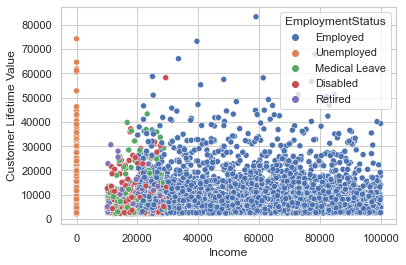

In [48]:
maritalstts = sns.scatterplot(x="Income", y="Customer Lifetime Value", hue="EmploymentStatus",
                     data=df)

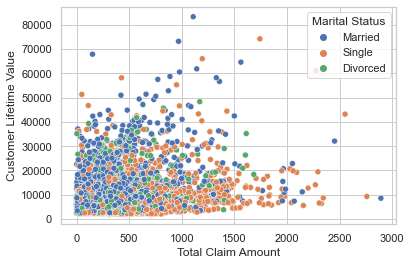

In [49]:
ax = sns.scatterplot(x="Total Claim Amount", y="Customer Lifetime Value", hue="Marital Status",
                     data=df)

In [51]:
df3 = new.copy()

df3['Monthly Premium Auto'] = np.log(df2['Monthly Premium Auto'])
df3['Total Claim Amount'] = np.log(df2['Total Claim Amount'])

In [52]:
from sklearn.preprocessing import PolynomialFeatures


y = np.log(df3['Customer Lifetime Value'])
x5 =df3.drop('Customer Lifetime Value',axis=1)

pol = PolynomialFeatures()


array = pol.fit_transform(x5)

df_pol = pd.DataFrame(array)
df_pol.columns = pol.get_feature_names(x5.columns)

In [54]:
df_pol_train, df_pol_test, y_train, y_test = train_test_split(df_pol, y, test_size = 0.25, random_state = 450)

print('Train Data Count: {}'.format(df_pol_train.shape[0]))
print('Test Data Count: {}'.format(df_pol_test.shape[0]))

df_pol_train = sm.add_constant(df_pol_train)
results_pol = sm.OLS(y_train, df_pol_train).fit()
results_pol.summary()

Train Data Count: 6850
Test Data Count: 2284


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.908
Model:                                 OLS   Adj. R-squared:                  0.905
Method:                      Least Squares   F-statistic:                     287.4
Date:                     Fri, 25 Nov 2022   Prob (F-statistic):               0.00
Time:                             02:50:43   Log-Likelihood:                 1373.0
No. Observations:                     6850   AIC:                            -2290.
Df Residuals:                         6622   BIC:                            -732.3
Df Model:                              227                                         
Covariance Type:                 nonrobust                                         
=================================================================================================================================
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------
1                                                                 0.0025      0.001      3.725      0.000       0.001       0.004
Accident Severity in State                                     9.228e-05   2.46e-05      3.746      0.000     4.4e-05       0.000
Number of Accidents in State                                      0.0004      0.000      3.541      0.000       0.000       0.001
Income                                                           -0.0010      0.000     -3.728      0.000      -0.002      -0.000
Monthly Premium Auto                                              0.2474      0.041      6.085      0.000       0.168       0.327
Months Since Last Claim                                          -0.0012      0.001     -1.469      0.142      -0.003       0.000
Months Since Policy Inception                                  1.734e-05      0.000      0.058      0.954      -0.001       0.001
Number of Open Complaints                                        -0.0133      0.010     -1.346      0.178      -0.033       0.006
Total Claim Amount                                               -0.0082      0.012     -0.689      0.491      -0.032       0.015
State Abbreviation_CA                                          2.511e-05   6.75e-06      3.723      0.000    1.19e-05    3.83e-05
State Abbreviation_NV                                           9.04e-06   2.38e-06      3.792      0.000    4.37e-06    1.37e-05
State Abbreviation_OR                                         -3.459e-06   9.23e-07     -3.746      0.000   -5.27e-06   -1.65e-06
State Abbreviation_WA                                          -6.82e-06   1.83e-06     -3.722      0.000   -1.04e-05   -3.23e-06
Marital Status_Married                                            0.0284      0.020      1.421      0.155      -0.011       0.068
Marital Status_Single                                             0.0165      0.024      0.691      0.489      -0.030       0.063
Number of Policies_2                                              0.2480      0.018     14.035      0.000       0.213       0.283
Number of Policies_3                                              0.1135      0.016      7.079      0.000       0.082       0.145
Education_College                                                 0.0012      0.018      0.068      0.946      -0.034       0.036
Education_Doctor                                                 -0.0246      0.039     -0.633      0.527      -0.101       0.052
Education_High School or Below                                    0.0005      0.018      0.029      0.977      -0.035       0.036
Education_Master                      

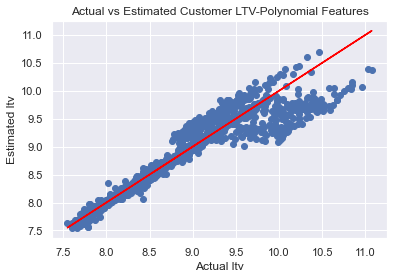

In [55]:
df_pol_test = sm.add_constant(df_pol_test)

y_preds = results_pol.predict(df_pol_test)
sns.set(color_codes=True)
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Actual ltv")
plt.ylabel("Estimated ltv", )
plt.title("Actual vs Estimated Customer LTV-Polynomial Features")
plt.show()

In [57]:
print("Mean Absolute Error (MAE)     : {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean Sq. Error (MSE)          : {}".format(mse(y_test, y_preds)))
print("Root Mean Sq. Error (RMSE)    : {}".format(rmse(y_test, y_preds)))
print("Mean Abs. Perc. Error (MAPE)  : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

Mean Absolute Error (MAE)     : 0.11363005747544346
Mean Sq. Error (MSE)          : 0.043824910371053905
Root Mean Sq. Error (RMSE)    : 0.20934400008372323
Mean Abs. Perc. Error (MAPE)  : 1.2105761428178612
